# Support Vector Machine (SVM)

Utilizar o modelo SVM para reconhecimento de voz (homem ou mulher) utilizando diversas propriedades da voz

Dataset obtido no Kaggle (https://www.kaggle.com/primaryobjects/voicegender)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('voice.csv')

In [3]:
dados.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Descrição

meanfreq -> frequencia média (kHz)

sd -> desvio padrão da frequencia (kHz)

median -> frequencia mediana (kHz)

Q25 -> primeiro quartil (kHz)

Q75 -> terceiro quartil (kHz)

IQR -> distância interquartil (kHz)

skew -> skewness

kurt -> kurtosis

sp.ent -> entropia espectral

sfm -> planitude espectral

mode -> moda da frequencia

centroid: centroide da frequencia

peakf -> pico da frequencia

meanfun -> média da frequencia fundamental

minfun -> mínimo da frequencia fundamental

maxfun -> máximo da frequencia fundamental

meandom -> média da frequencia dominante

mindom -> mínimo da frequencia dominante

maxdom -> máximo da frequencia dominante

dfrange -> variação da frequencia dominante

modindx -> indíce de modulação

label -> homem ou mulher

Exibindo informações da amostra

In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
dados.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Verificando existência de valores nulos

In [7]:
dados.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Analisando distribuição das variáveis

/home/danilo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


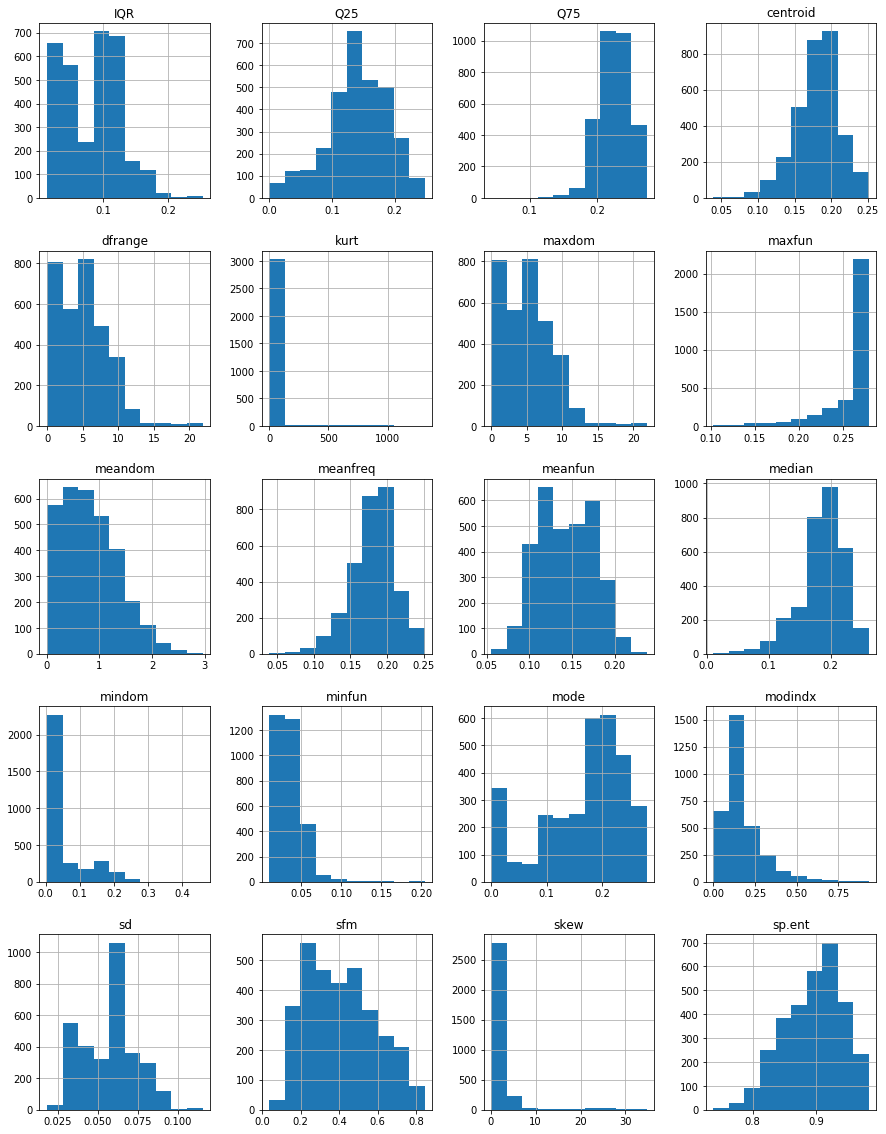

In [49]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dados.drop('label',axis=1).hist(ax=ax);

Armazenando nomes das colunas

In [8]:
colunas = dados.columns

Determinando a correlação entre as variáveis

In [9]:
correlacao = dados.corr()

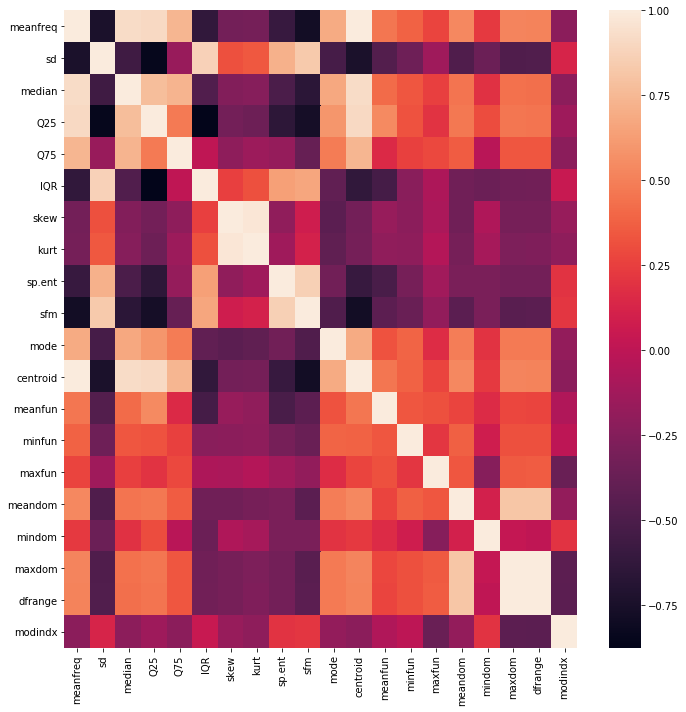

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlacao,label=colunas)
plt.tight_layout()

Verificando se a amostra está balanceada

In [15]:
dados['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

Verificamos que a amostra está bem balanceada

Analisando os valores, notamos que o processo de normalização não será necessário

Convertendo a variável categórica label para numérica

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
enconder = LabelEncoder()

In [18]:
dados['label'] = enconder.fit_transform(dados['label'])

In [19]:
dados.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [20]:
enconder.classes_

array(['female', 'male'], dtype=object)

Determiando variáveis X e Y

In [23]:
X = dados.drop('label',axis=1).values
Y = dados['label'].values

Separando em amostra de treino e teste

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo SVM

In [26]:
from sklearn.svm import SVC

In [27]:
modelo = SVC()

In [28]:
modelo.fit(X_treino,Y_treino)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
modelo.score(X_treino,Y_treino)

0.6687710437710438

In [30]:
Y_previsto = modelo.predict(X_teste)

In [31]:
modelo.score(X_teste,Y_teste)

0.6868686868686869

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm=confusion_matrix(Y_teste,Y_previsto)

In [34]:
cm

array([[222, 151],
       [ 97, 322]])

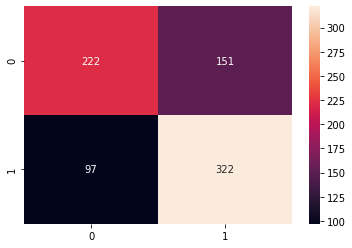

In [46]:
sns.heatmap(cm,annot=True, fmt="d")

Observamos que a acurácia de treino e teste não são boas. Elas podem ser melhoradas se refinarmos os parâmetros de entrada do modelo SVM utilizando GridSearchCV